## 📊 Algoritmo K-Means

**K-Means** es un algoritmo de *clustering* no supervisado que se utiliza para agrupar un conjunto de datos en **K** grupos (o clústeres) distintos, basándose en la similitud entre los datos.

### 🧠 ¿Cómo funciona?

1. **Elección del número de clústeres (K):**
   - El usuario define cuántos grupos quiere encontrar en los datos.

2. **Inicialización de los centroides:**
   - Se seleccionan aleatoriamente K puntos como centroides iniciales.

3. **Asignación de puntos:**
   - Cada punto del conjunto de datos se asigna al clúster cuyo centroide esté más cercano (usualmente se usa la **distancia euclidiana**).

4. **Recalculación de centroides:**
   - Se actualiza la posición de cada centroide como el promedio de los puntos asignados a su clúster.

5. **Iteración:**
   - Se repiten los pasos 3 y 4 hasta que los centroides ya no cambien significativamente (convergencia) o se alcance un número máximo de iteraciones.

### 📌 Objetivo

Minimizar la **suma de las distancias cuadradas** entre cada punto y su centroide correspondiente. Esta suma se conoce como **inercia intra-clúster** o **within-cluster sum of squares (WCSS)**.

### 📈 Visualización (esquema)

```
Datos -> Inicialización -> Asignación -> Reajuste -> Repetir -> Resultado final
```

### ✅ Ventajas

- Rápido y fácil de implementar.
- Escalable para grandes conjuntos de datos.
- Útil cuando los grupos son bien diferenciados.

### ⚠️ Limitaciones

- Es sensible a la inicialización aleatoria.
- Requiere definir el valor de **K** de antemano.
- Supone que los clústeres son esféricos y de tamaño similar.
- No es adecuado para datos con formas no convexas o ruido significativo.

### 🧪 Selección del número óptimo de K

Una técnica común es el **método del codo (elbow method)**:

- Se entrena el modelo para diferentes valores de K.
- Se grafica el valor de WCSS contra K.
- El punto donde la disminución de WCSS comienza a estabilizarse (el "codo") indica un buen valor de K.

### 📚 Aplicaciones
- Segmentación de clientes en marketing.
- Compresión de imágenes.
- Agrupamiento de documentos o temas.
- Análisis exploratorio de datos.

In [4]:
import pandas as pd
df_jugadores = pd.read_csv("../data/jugadores.csv")
df_jugadores.head(10)

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047
5,6,Dr. Justin Anderson,Mediocampista,33,16,3,3,86.5,40,75.9,1200
6,7,Sandra Shepherd,Portero,35,23,4,2,90.2,2,51.2,2070
7,8,Mark Bowers,Mediocampista,28,14,5,4,81.1,50,79.6,910
8,9,Kenneth Cook,Portero,25,15,2,0,86.8,0,0.0,1035
9,10,Christopher Parks,Portero,26,12,4,10,78.7,7,63.6,1032


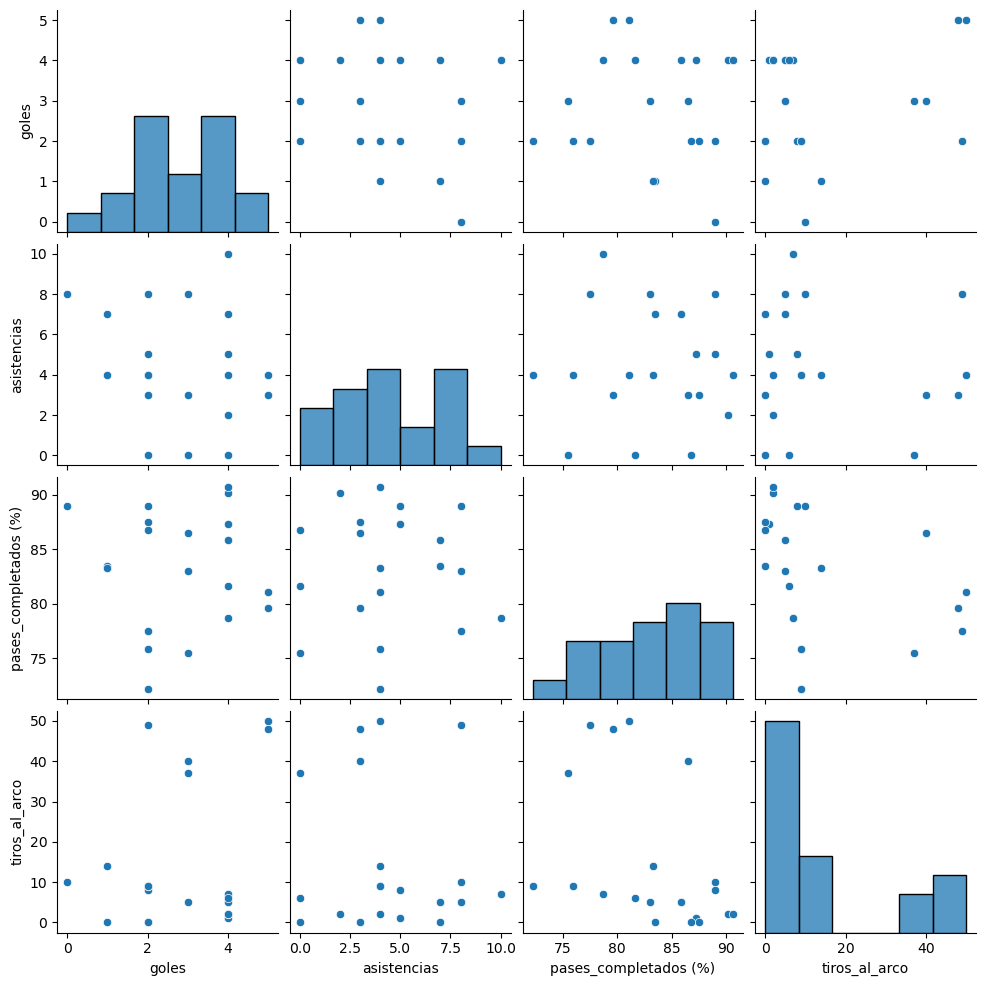

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.pairplot(df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']])
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Selección de características para el clustering 
X = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

kmeans = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(X)

df_jugadores.head(10)

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados,cluster
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125,1
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032,0
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816,1
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496,2
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047,1
5,6,Dr. Justin Anderson,Mediocampista,33,16,3,3,86.5,40,75.9,1200,0
6,7,Sandra Shepherd,Portero,35,23,4,2,90.2,2,51.2,2070,1
7,8,Mark Bowers,Mediocampista,28,14,5,4,81.1,50,79.6,910,0
8,9,Kenneth Cook,Portero,25,15,2,0,86.8,0,0.0,1035,1
9,10,Christopher Parks,Portero,26,12,4,10,78.7,7,63.6,1032,2


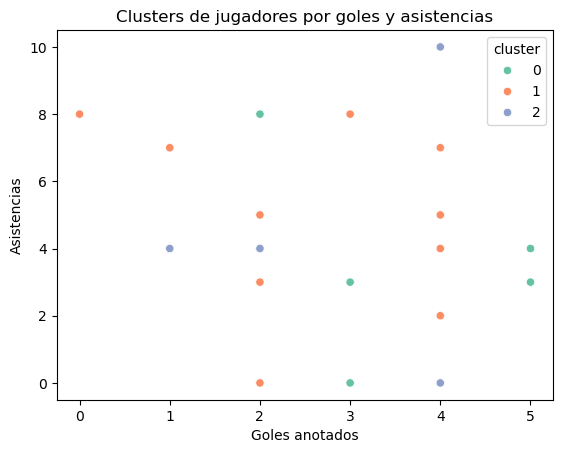

In [11]:
sns.scatterplot(x='goles', y='asistencias', hue='cluster', palette='Set2', data=df_jugadores)
plt.title("Clusters de jugadores por goles y asistencias")
plt.xlabel("Goles anotados")
plt.ylabel("Asistencias")
plt.show()

In [12]:
columnas_numericas = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']
perfiles = df_jugadores.groupby('cluster')[columnas_numericas].mean()
print(perfiles)

         goles  asistencias  pases_completados (%)  tiros_al_arco
cluster                                                          
0          3.6          3.6                  80.04           44.8
1          2.6          4.9                  87.29            3.3
2          2.6          4.4                  78.34            9.0


In [13]:
import ipywidgets as widgets

def clustering_interactivo(k):
    km = KMeans(n_clusters=k, random_state=42)
    df_jugadores['cluster_temp'] = km.fit_predict(X)
    
    sns.scatterplot(x='goles', y='asistencias', hue='cluster_temp', palette='Set1', data=df_jugadores)
    plt.title(f"Clustering jugadores con {k} clusters")
    plt.xlabel("Goles")
    plt.ylabel("Asistencias")
    plt.show()

widgets.interactive(clustering_interactivo, k=(2,6,1))

interactive(children=(IntSlider(value=4, description='k', max=6, min=2), Output()), _dom_classes=('widget-inte…